In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("C:/Users/Abhishek/Desktop/Data Sets/Imarticus")


In [2]:
# To Display All Rows and Columns. Do this when you wan to see all columns and Rows

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("car_price.csv")
data.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.shape

(205, 26)

### 1. We have some weird character "?" in some columns, need to check which all columns have them and Deal with them.

In [5]:
# Check whichall columns have weird character "?"
cols = data.columns
for i in cols:
    if "?" in data[i].values:
        print("\n ?  exists in :")
        print(i)


 ?  exists in :
normalized_losses

 ?  exists in :
num_of_doors

 ?  exists in :
bore

 ?  exists in :
stroke

 ?  exists in :
horsepower

 ?  exists in :
peak_rpm

 ?  exists in :
price


In [6]:
# removing "?" from  Columns
data.replace({"normalized_losses" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"num_of_doors" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"bore" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"stroke" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"horsepower" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"peak_rpm" : {"?":np.nan}}, regex=False, inplace=True)
data.replace({"price" : {"?":np.nan}}, regex=False, inplace=True)

In [7]:
# Check Null values
data.isna().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

### 2. Deal with Missing Values

### Price is our target column and we have missing values in that, we dont impute our Target columns, we should Drop missing values from this

In [8]:
data.dropna(subset=["price"],inplace=True)

In [9]:
data.price.isna().sum()

0

###  2.1 ShortCut to Fill Mean  (Only Numeric Columns )

- Fill Nulls of each column by that columns Median

In [10]:
data.isna().sum()

symboling             0
normalized_losses    37
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [11]:
data.fillna(data.median(),inplace=True)

### 2.2 Removing Nulls from Categorical columns

In [12]:
data.num_of_doors.value_counts()

four    113
two      86
Name: num_of_doors, dtype: int64

In [13]:
data.num_of_doors.fillna("four",inplace=True)

In [14]:
data.isna().sum()

#All Null Removed

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### 3. Converting Columns to correct Datatype

### 3.1 The columns which had "?" were originally int but because of this weird characters they were present as Object.

- We Removed the weird charater, but these columns are still Object type but should be numeric.
- **Correctly converting back to numeric i.e int**

In [15]:
data[["normalized_losses","bore","stroke","peak_rpm","horsepower","price"]] = data[["normalized_losses","bore","stroke","peak_rpm","horsepower","price"]].astype("float64")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    object 
 3   make               201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   aspiration         201 non-null    object 
 6   wheel_base         201 non-null    object 
 7   engine_location    201 non-null    object 
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    object 
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

### 4. Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [18]:
data[data.select_dtypes(include="object").columns] = data[data.select_dtypes(include="object").columns].apply(encoder.fit_transform)

In [19]:
data.head(3)
# normalized_losses,bore,stroke,peak_rpm,horsepower

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,1,0,1,2,2,0,94.5,0,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


---

## 5.Sampling

In [20]:
X = data.drop("price",axis=1) 
Y = data["price"]

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2 , random_state=111)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 25)
(160,)
(41, 25)
(41,)


---

### Estimating How the Model will Perform

In [22]:
corr = data.corr()
corr

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.457735,0.196735,-0.054615,0.672344,-0.600333,-0.053056,0.212339,-0.535987,-0.129645,-0.365404,-0.242423,-0.550160,-0.233118,0.091801,0.199377,-0.110581,0.091601,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized_losses,0.457735,1.000000,0.105970,-0.010780,0.355303,-0.246047,0.291007,-0.021948,-0.075109,-0.237573,-0.009116,0.061799,-0.371830,0.065393,-0.054761,0.171445,0.073586,0.198932,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
Fuel_type,0.196735,0.105970,1.000000,-0.408228,0.186681,-0.147654,-0.131096,0.040917,-0.307237,-0.109330,-0.211187,-0.244356,-0.281578,-0.221046,0.124051,0.120638,-0.070779,0.042824,-0.054944,-0.240312,-0.985231,0.168190,0.476260,-0.265676,-0.198690,-0.110326
make,-0.054615,-0.010780,-0.408228,1.000000,-0.063017,0.072079,0.094469,-0.057496,0.256889,0.071254,0.230085,0.305732,0.090336,0.321955,-0.130898,-0.129771,0.110040,0.282269,0.228489,0.217190,0.307522,0.252219,-0.190757,-0.189237,-0.241851,0.179578
num_of_doors,0.672344,0.355303,0.186681,-0.063017,1.000000,-0.688542,0.115920,0.142340,-0.445245,-0.146172,-0.395122,-0.227655,-0.538383,-0.208517,0.109089,0.185434,-0.024094,-0.001246,-0.120915,0.010194,-0.169164,0.102504,0.232247,0.027617,0.045787,-0.042435
aspiration,-0.600333,-0.246047,-0.147654,0.072079,-0.688542,1.000000,-0.161004,-0.278350,0.407128,0.090621,0.347571,0.155366,0.571107,0.145762,-0.080350,-0.063741,-0.063692,-0.054810,0.022283,-0.014961,0.134622,-0.137536,-0.105006,0.014217,-0.021328,-0.072933
wheel_base,-0.053056,0.291007,-0.131096,0.094469,0.115920,-0.161004,1.000000,0.149369,0.467661,-0.034844,0.495197,0.481395,-0.025096,0.590642,-0.067339,0.231177,0.526027,0.435926,0.470027,0.081378,0.120125,0.547256,-0.036705,-0.469240,-0.472893,0.588333
engine_location,0.212339,-0.021948,0.040917,-0.057496,0.142340,-0.278350,0.149369,1.000000,-0.189115,0.053312,-0.053086,-0.052205,-0.109225,0.051287,0.125683,0.136009,0.199367,0.106735,0.188583,-0.139593,-0.020467,0.342336,0.201696,-0.157132,-0.102964,0.331062
drive_wheels,-0.535987,-0.075109,-0.307237,0.256889,-0.445245,0.407128,0.467661,-0.189115,1.000000,0.073930,0.876024,0.814507,0.590742,0.782097,-0.143928,-0.190489,0.572027,0.381273,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
body_style,-0.129645,-0.237573,-0.109330,0.071254,-0.146172,0.090621,-0.034844,0.053312,0.073930,1.000000,0.110468,-0.005115,0.230754,0.017115,-0.044549,-0.049947,-0.084770,0.144769,0.237813,-0.205173,0.132554,-0.065912,-0.211957,0.065761,0.059111,-0.163646


In [23]:
corr.price.sort_values(ascending=False).head(10)
# As we have engine_size, R2 will be atleast/Around 87.

price           1.000000
engine_size     0.872335
curb_weight     0.834415
horsepower      0.810500
width           0.751265
length          0.690628
wheel_base      0.588333
drive_wheels    0.584642
bore            0.543158
fuel_system     0.521689
Name: price, dtype: float64

<AxesSubplot:>

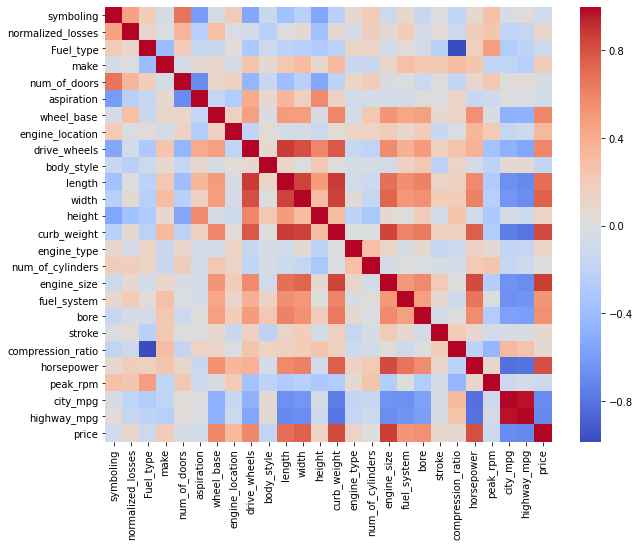

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="coolwarm")

# 6.Model Building - 1(On original Data)

In [25]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train , y_train)

LinearRegression()

In [99]:
print("The Intercept of our Model is : ",LR.intercept_)
print("*"*100)
print("The Coefficient's of our Model  : \n ",LR.coef_)

The Intercept of our Model is :  -55465.16338267594
****************************************************************************************************
The Coefficient's of our Model  : 
  [ 1.94262470e+02 -1.78293505e+01 -3.11714543e+03  7.07745466e+02
 -1.25872421e+03 -1.11308963e+03  1.21461758e+03  1.03293649e+04
  9.71403726e+00 -1.92662459e+02  1.45487324e+01  6.30764035e+02
  2.44563912e+02  3.07563480e+00  8.40102277e+01  3.97928616e+02
  1.00479393e+02  7.11603166e+01 -1.09795985e+03 -2.67616041e+03
 -1.85236018e+02  6.43261244e+00  1.89265352e+00 -1.67504222e+01
  5.44607468e+01]


In [26]:
R2 = LR.score(X_train , y_train)
print("R-Square : ",R2)

# As Expected R2 Score is above 87.

R-Square :  0.9090492008852977


In [27]:
# Functio to Calculate Adjusted R-Square
def Adj_Rsquare (model , X_train , y_train):
    RSquare = model.score( X_train, y_train)
    N = X_train.shape[0]
    K = X_train.shape[1]
    Adj_Rsquare_value = 1-((1-RSquare) * (N-1) / (N-K-1))
    return Adj_Rsquare_value

In [28]:
Adj_R2 = Adj_Rsquare(LR,X_train , y_train)
print("Adjusted R-Square : ",Adj_R2)

# R2 and Adj-R2 are close, So no need of Feature Selection, as Adj-R2 as already close to R2 which mean all the features used are significant.

Adjusted R-Square :  0.8920807682146443


- **Check magnitude** of Each feature in LR model

In [29]:
coef_LR = LR.coef_
cols = X_train.columns
coef = pd.Series(coef_LR,cols).sort_values()  # Always Put coefs first then column names

<AxesSubplot:>

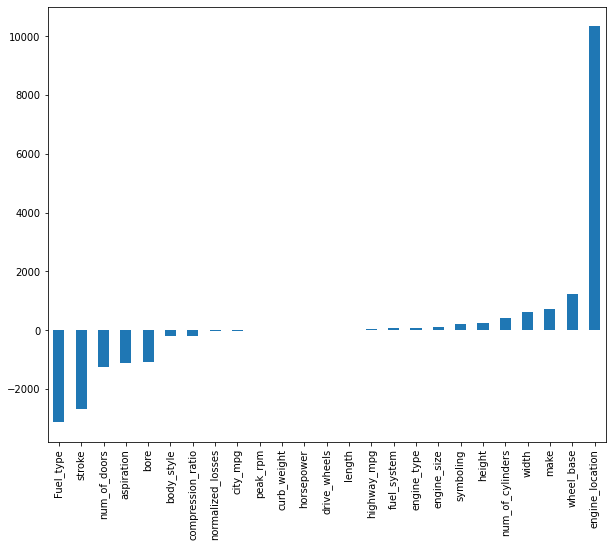

In [30]:
plt.figure(figsize=(10,8))
coef.plot(kind="bar")

# Feature Engine_Location is really Dominating the model a lot

---

In [31]:
# Predict Using the Model
y_pred =  LR.predict(X_test)

y_pred_train = LR.predict(X_train)

In [32]:
# Calculate Error for Train and Test

error_train = y_train - y_pred_train

error_test  = y_test - y_pred

# Check the Assumptions, Always Check Assumptions on Training Data

**1.Checking if Mean of X_train ERROR is 0**

-> -1.887201506178826e-11 Basically means 0 so it is correct

In [33]:
mean_error_model1 = np.mean(error_train)
print("Mean of X_train is : {}".format(np.mean(error_train)))

Mean of X_train is : -1.887201506178826e-11


**2. Check if there is any Pattern in the Error**

Errors over   5000 :  3
Errors below -5000 :  4


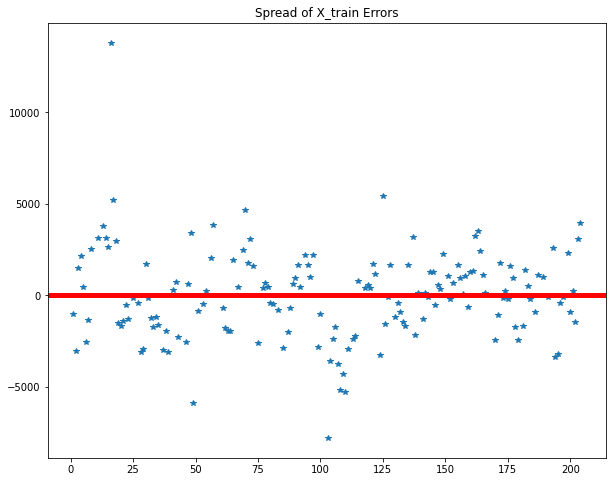

In [34]:
plt.figure(figsize=(10,8))
plt.plot(error_train,"*")
plt.axhline(y=0,color="r",linewidth=5)
plt.title("Spread of X_train Errors")

# Mostly Error spread between -5000 to 5000 a few outliers, so no patterns in errors

print("Errors over   5000 : ",(error_train > 5000).sum())
print("Errors below -5000 : ",(error_train < -5000).sum())

**2.Check if errors are  normally distributed**

<AxesSubplot:xlabel='price'>

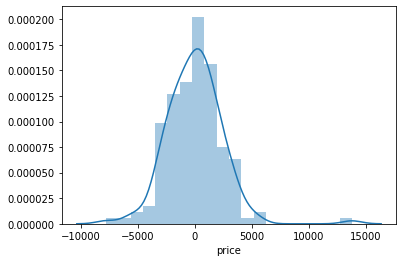

In [35]:
sns.distplot(error_train)

# We have this 1 extreme Outlier, looks just a little right skewed

**4  Variance around the line should be less**

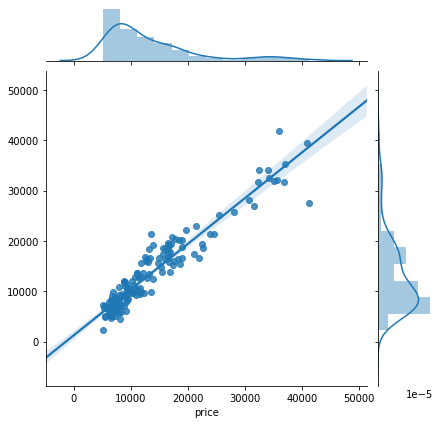

In [36]:
sns.jointplot(x=y_train,y= y_pred_train,kind="reg")

# There is a Bit of Variance around the line.

In [37]:
# Checking Scores for Both Train and Test
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MSE Train",mean_squared_error(y_train , y_pred_train))
print("MSE Test",mean_squared_error(y_test , y_pred))
print("*"*100)
print("MAE Train",mean_absolute_error(y_train , y_pred_train))
print("MAE Test",mean_absolute_error(y_test , y_pred))
print("*"*100)
print("RMSE Train",np.sqrt(mean_squared_error(y_train , y_pred_train)))
print("RMSE Test",np.sqrt(mean_squared_error(y_test , y_pred)))


MSE Train 5962179.698032511
MSE Test 10392207.212487092
****************************************************************************************************
MAE Train 1806.205924947769
MAE Test 2629.212395414219
****************************************************************************************************
RMSE Train 2441.7575018892667
RMSE Test 3223.6946524891423


## Observation :
1. Assumption 1:Mean is close to 0, but it is -ve
2. Assumption 2: Data looks a bit Right skewed
3. Assumption 3: Could see 1 Very Extreme Outlier, and few normal outliers
4. Assumption 4: Could see  a Bit of Variance around the line.

**- From multiple observations, we think this can be caused due to outliers. Therefore lets check the Outliers in Y column**

-----

# Model Building - 2(After Deleting Outliers)

# Here we will check the same Assumptions, but after deleting the outliers

No of Points Above 26000 : 16


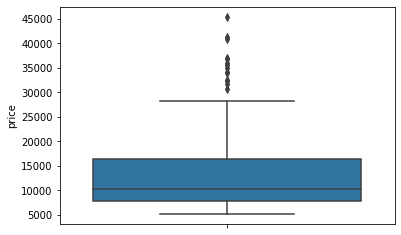

In [38]:
sns.boxplot(data.price, orient="v")

print("No of Points Above 26000 :",(data.price > 26000).sum())

# We can see some outliers in Price
#SHOULD THESE 16 POINTS BE CONSIDERED AS OUTLIERS AND DELETED

In [39]:
data.price.describe()
# Once Again we can see, Mean is 13207 but 75% data is around 16500, so there ought to beoutliers

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

- Deleting the outliers , **Using k=3** is 3 S.D

In [40]:
# K is the S.D we want, we can change it higher the values, less outliers will be removed (we remove only extreme outliers).

#(x>mean-(k*sd)) : if we want to remove 3 S.D, we will pass k=3 so here first k*S.D so we will subtract mean from 3 S.D.
# Similary for (x<mean+(k*sd))


# df1 : will be our resulting dataframe with outliers removed
def rem_outliers(df , col , k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    
    #Here we will have values only greater than Lower Limit
    final_list = [x for x in df[col] if (x>mean-(k*sd))]    # Here Mean - 2*S.D gives us Lower limit (Refer Distribution diagram)
    
    #Here we will have values only Smaller than Upper Limit (So all values betwen upper and lowe limit i.e No Outliers)
    final_list = [x for x in final_list if (x<mean+(k*sd))] # Here Mean + 2*S.D gives us Upper limit
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape)

In [41]:
print("Old shape",data.shape)

Old shape (201, 26)


In [42]:
rem_outliers(data,"price",k=3)

(198, 26)


### Now we will Check assumptions on this new Dataframe "data_new" , which is free from outliers.

In [43]:
data_new = df1

In [44]:
data_new.shape , data.shape # We have Removd 3 outliers so difference of 3.

((198, 26), (201, 26))

In [45]:
# WO stands for Without outlier

X_WO = data_new.drop("price",axis=1) 
Y_WO = data_new["price"]

In [46]:
from sklearn.model_selection import train_test_split

X_trainWO,X_testWO,y_trainWO,y_testWO = train_test_split(X_WO,Y_WO,test_size=0.2 , random_state=111)

print(X_trainWO.shape)
print(y_trainWO.shape)
print(X_testWO.shape)
print(y_testWO.shape)

(158, 25)
(158,)
(40, 25)
(40,)


In [47]:
LR1 = LinearRegression()

LR1.fit(X_trainWO,y_trainWO)

LinearRegression()

In [48]:
R2_WO = LR1.score(X_trainWO,y_trainWO)
Adj_R2_WO = Adj_Rsquare(LR1,X_trainWO,y_trainWO)
print("R-Square : ",R2_WO)
print("Adjusted R-Square ", Adj_R2_WO)

R-Square :  0.9015661226487466
Adjusted R-Square  0.8829233428473728


In [49]:
y_prednewTrain = LR1.predict(X_trainWO)

In [50]:
y_prednewTest  = LR1.predict(X_testWO)

In [51]:
error_new = y_trainWO - y_prednewTrain

### Assumption 1 : Mean is Near to 0, and also +ve unlike original Data

In [52]:
mean_Error_m3 = np.mean(error_new)
mean_Error_m3

6.447051050542276e-13

### Assumption 2: Data Still a bit Right skewed

<AxesSubplot:xlabel='price'>

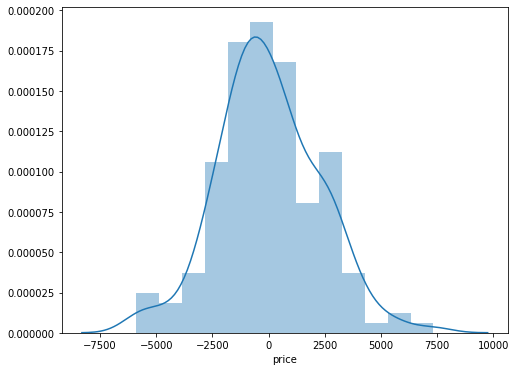

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(error_new,label="After Outliers Removed")

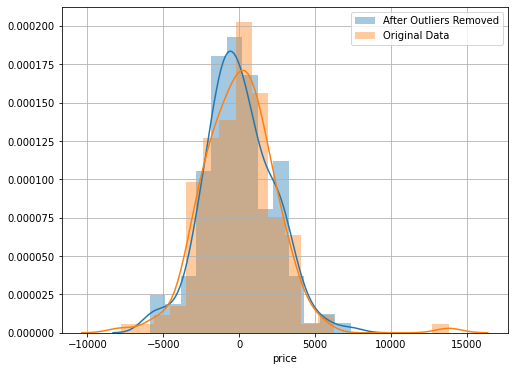

In [54]:
# Comparing Distibution, Before and After Removing Outliers

plt.figure(figsize=(8,6))
sns.distplot(error_new,label="After Outliers Removed")
sns.distplot(error_train,label="Original Data")
plt.grid()
plt.legend()

## WHICH ONE IS BETTER ???????????????????????????????????????????????????

### Assumption 2: Could see 1 Very Extreme Outlier, and few normal outliers

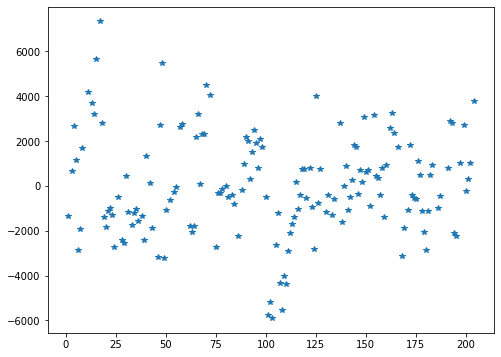

In [55]:
plt.figure(figsize=(8,6))
plt.plot(error_new,"*")

# Now we onlty 1 extreme Outlier (>6K)

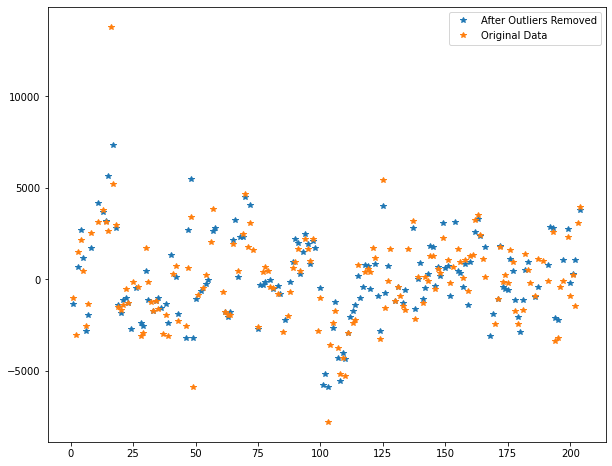

In [56]:
plt.figure(figsize=(10,8))
plt.plot(error_new,"*",label="After Outliers Removed")
plt.plot(error_train,"*",label="Original Data")
plt.legend()

# Data After Outliers Removed has Less extreme Outliers

### Assumption 4 : Variance Around the Line

Text(0.5, 1.0, 'After Removing Outliers')

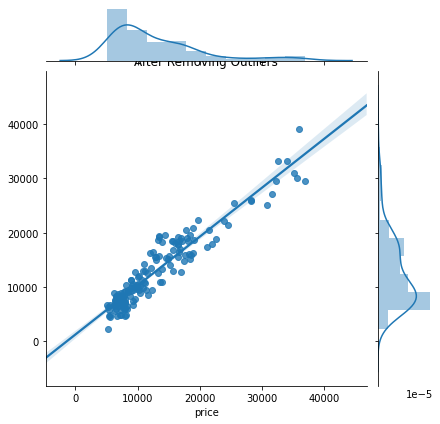

In [57]:
sns.jointplot(x=y_trainWO , y=y_prednewTrain , kind="reg" )
plt.title("After Removing Outliers")

# Better than Before, but can still see a few outliers

Text(0.5, 1.0, 'Original Data')

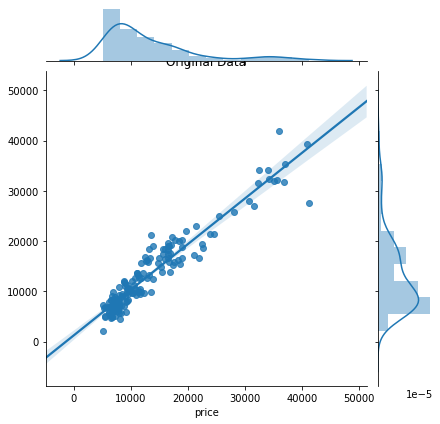

In [58]:
sns.jointplot(x=y_train,y= y_pred_train,kind="reg")
plt.title("Original Data")

In [59]:
# Checking Scores for Both Train and Test ON ORIGINAL DATA
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MSE Train",mean_squared_error(y_train , y_pred_train))
print("MSE Test",mean_squared_error(y_test , y_pred))
print("*"*100)
print("MAE Train",mean_absolute_error(y_train , y_pred_train))
print("MAE Test",mean_absolute_error(y_test , y_pred))
print("*"*100)
print("RMSE Train",np.sqrt(mean_squared_error(y_train , y_pred_train)))
print("RMSE Test",np.sqrt(mean_squared_error(y_test , y_pred)))


MSE Train 5962179.698032511
MSE Test 10392207.212487092
****************************************************************************************************
MAE Train 1806.205924947769
MAE Test 2629.212395414219
****************************************************************************************************
RMSE Train 2441.7575018892667
RMSE Test 3223.6946524891423


In [60]:
# Checking Scores for Both Train and Test AFTER REMOVING OUTLIERS
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MSE Train",mean_squared_error(y_trainWO , y_prednewTrain))
print("MSE Test",mean_squared_error(y_testWO , y_prednewTest))
print("*"*100)
print("MAE Train",mean_absolute_error(y_trainWO , y_prednewTrain))
print("MAE Test",mean_absolute_error(y_testWO , y_prednewTest))
print("*"*100)
print("RMSE Train",np.sqrt(mean_squared_error(y_trainWO , y_prednewTrain)))
print("RMSE Test",np.sqrt(mean_squared_error(y_testWO , y_prednewTest)))


MSE Train 5068068.922201904
MSE Test 7318270.32009996
****************************************************************************************************
MAE Train 1764.4474832494088
MAE Test 2268.271242336525
****************************************************************************************************
RMSE Train 2251.237198120603
RMSE Test 2705.230178764824


### Scores Look Much better with Outliers Removed.

### And other assumptions too, more or less look better with Outliers Removed.

---

---

# Model Building - 3(After deleting the Outliers, and selecting only Important Features)

- Here we can directly use **X_trainWO,X_testWO,y_trainWO,y_testWO**, **As this data is sampeled on Outlier Deleted Data.**

- **Get N important Features using RFE**

In [61]:
from sklearn.feature_selection import RFE

# Fit the Model
LR_temp = LinearRegression()
LR_temp.fit(X_trainWO , y_trainWO)

# Call the rfe object, and pass base estimator and number of Important features we want.
rfe = RFE(LR_temp , 20)
rfe.fit(X_trainWO , y_trainWO) # Fit the rfe model

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [62]:
rfe.support_ # Get Top 20 imp features

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True])

In [63]:
# To select only imp Features from X_train

a= list(rfe.support_)
imp_cols = X_trainWO.columns[a]

- **Fit the model only on Top N imp features**

In [64]:
LR3 = LinearRegression()
LR3.fit( pd.DataFrame(X_trainWO.loc[:, imp_cols]) , y_trainWO )

LinearRegression()

In [65]:
# fse = Feature selection model

R2_fse = LR3.score( pd.DataFrame(X_trainWO.loc[:, imp_cols]) , y_trainWO )
Adj_R2_fse = Adj_Rsquare(LR3 ,pd.DataFrame(X_trainWO.loc[:, imp_cols]) , y_trainWO ) 

print("R-Square After Featre Selection: ",R2_fse)
print("Adjusted R-Square After Featre Selection ", Adj_R2_fse)

R-Square After Featre Selection:  0.8924461137279271
Adjusted R-Square After Featre Selection  0.8767448164619311


In [66]:
print("R-Square Original Data: ",R2)
print("Adjusted R-Square  Original Data", Adj_R2)

R-Square Original Data:  0.9090492008852977
Adjusted R-Square  Original Data 0.8920807682146443


In [67]:
print("R-Square After Deleting Outlier: ",R2_WO)
print("Adjusted R-Square  After Deleting Outlier", Adj_R2_WO)

R-Square After Deleting Outlier:  0.9015661226487466
Adjusted R-Square  After Deleting Outlier 0.8829233428473728


- **How to Interpreat Based on these Scores ???????????????????????????????????????????????????????**

### Predict train and test using fse model, AND USE ONLY THE IMP FEATURES

In [68]:
y_pred_test_fse = LR3.predict(X_testWO.loc[:, imp_cols])
y_pred_train_fse = LR3.predict(X_trainWO.loc[:, imp_cols])

- **Calculate Train and Test Errors for fse**

In [69]:
error_test_fse  = y_testWO  - y_pred_test_fse
error_train_fse = y_trainWO - y_pred_train_fse

## Checking Assumptions After Building model on Feature selection(Top 20 features)

- **Assumption 1 Mean of error is 0**

In [70]:
mean_error_M3 = np.mean(error_train_fse)
mean_error_M3

# Error os close to 0, but +ve

-1.9249052422333366e-11

- **Assumption 2 Distribution of error**

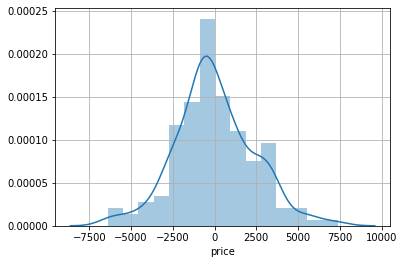

In [71]:
sns.distplot(error_train_fse)
plt.grid()

# Data is more right skewed

- **Assumption 2 Distribution of error**

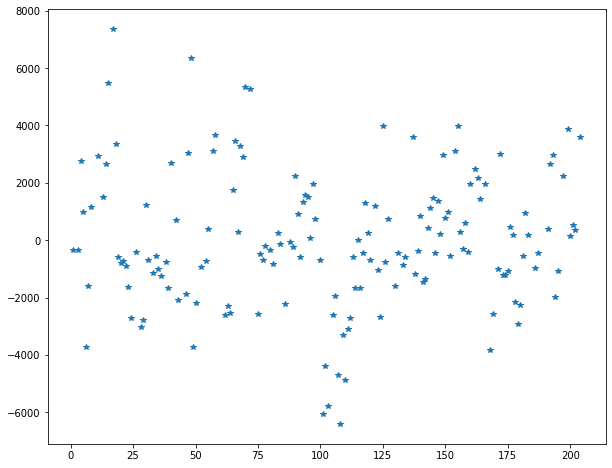

In [72]:
plt.figure(figsize=(10,8))
plt.plot(error_train_fse,"*")

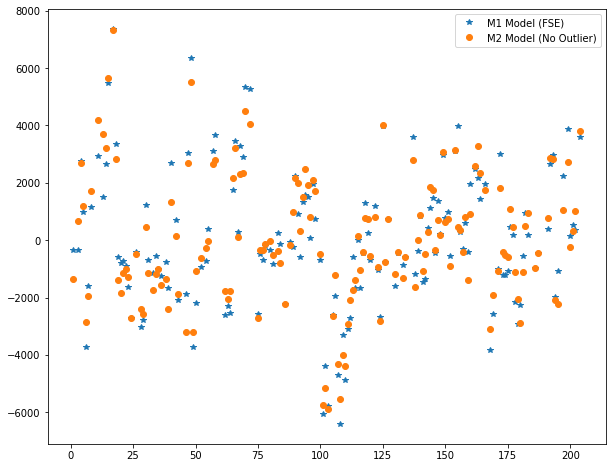

In [73]:
plt.figure(figsize=(10,8))
plt.plot(error_train_fse,"*",label= "M1 Model (FSE)")
plt.plot(error_new,"o",label="M2 Model (No Outlier)")
plt.legend()

- **Assumption 4 variance around the line**

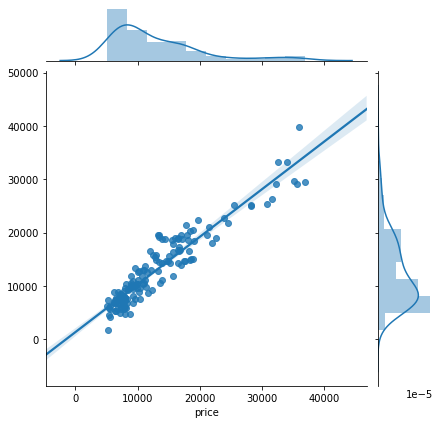

In [74]:
sns.jointplot( x=y_trainWO,y=y_pred_train_fse,kind="reg")

In [75]:
# Checking Scores for Both Train and Test AFTER REMOVING OUTLIERS
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MSE Train",mean_squared_error(y_trainWO , y_prednewTrain))
print("MSE Test",mean_squared_error(y_testWO , y_prednewTest))
print("*"*100)
print("MAE Train",mean_absolute_error(y_trainWO , y_prednewTrain))
print("MAE Test",mean_absolute_error(y_testWO , y_prednewTest))
print("*"*100)
print("RMSE Train",np.sqrt(mean_squared_error(y_trainWO , y_prednewTrain)))
print("RMSE Test",np.sqrt(mean_squared_error(y_testWO , y_prednewTest)))


MSE Train 5068068.922201904
MSE Test 7318270.32009996
****************************************************************************************************
MAE Train 1764.4474832494088
MAE Test 2268.271242336525
****************************************************************************************************
RMSE Train 2251.237198120603
RMSE Test 2705.230178764824


In [76]:
# Checking Scores for Both Train and Test AFTER REMOVING OUTLIERS and taking TOP 20 features based on RFE
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("MSE Train",mean_squared_error(y_trainWO , y_pred_train_fse))
print("MSE Test",mean_squared_error(y_testWO , y_pred_test_fse))
print("*"*100)
print("MAE Train",mean_absolute_error(y_trainWO , y_pred_train_fse))
print("MAE Test",mean_absolute_error(y_testWO , y_pred_test_fse))
print("*"*100)
print("RMSE Train",np.sqrt(mean_squared_error(y_trainWO , y_pred_train_fse)))
print("RMSE Test",np.sqrt(mean_squared_error(y_testWO , y_pred_test_fse)))


MSE Train 5537631.180903489
MSE Test 6287158.075100657
****************************************************************************************************
MAE Train 1810.0625759776735
MAE Test 2211.168661177123
****************************************************************************************************
RMSE Train 2353.2171979873615
RMSE Test 2507.420601953461


### RMSE, MAE,MSE for Test looks Better with FSE(model where we used Feature Selection)
### Basically the Gap between Train and Test is Better with FSE

---

# Conclusions

### We Created 3 Models : 
- M1. On Original Data
- M2. Removed Outliers From the Data.
- M3. Removed outliers and took Top 20 Features using RFE

In [77]:
from prettytable import PrettyTable
myTable = PrettyTable(["Model","R-Square", "Adjusted R-Square", "Error Mean", "RMSE Train","RMSE Test"])
myTable.add_row(["Model 1", R2, Adj_R2, mean_error_model1,np.sqrt(mean_squared_error(y_train , y_pred_train)),np.sqrt(mean_squared_error(y_test , y_pred))])
myTable.add_row(["Model 2",R2_WO,Adj_R2_WO,mean_Error_m3,np.sqrt(mean_squared_error(y_trainWO , y_prednewTrain)),np.sqrt(mean_squared_error(y_testWO , y_prednewTest))])
myTable.add_row(["Model 3",R2_fse , Adj_R2_fse , mean_error_M3,np.sqrt(mean_squared_error(y_trainWO , y_pred_train_fse)),np.sqrt(mean_squared_error(y_testWO , y_pred_test_fse))])

In [78]:
print(myTable)

+---------+--------------------+--------------------+-------------------------+--------------------+--------------------+
|  Model  |      R-Square      | Adjusted R-Square  |        Error Mean       |     RMSE Train     |     RMSE Test      |
+---------+--------------------+--------------------+-------------------------+--------------------+--------------------+
| Model 1 | 0.9090492008852977 | 0.8920807682146443 |  -1.887201506178826e-11 | 2441.7575018892667 | 3223.6946524891423 |
| Model 2 | 0.9015661226487466 | 0.8829233428473728 |  6.447051050542276e-13  | 2251.237198120603  | 2705.230178764824  |
| Model 3 | 0.8924461137279271 | 0.8767448164619311 | -1.9249052422333366e-11 | 2353.2171979873615 | 2507.420601953461  |
+---------+--------------------+--------------------+-------------------------+--------------------+--------------------+


Difference Between Rmse train and Test is the Lowest in M3 : 154.20

- **Our Best RMSE Test is 2507, Considering the Mean values of Y is 12671. I Think the RMSE is Decent**

### Other Observations :

- Q1 Which of the 3 Distribution of Errors is Best????????????
- Q2 While Checking Patterns in Error :
   M1-> Had some Extreme Outliers
   M2-> Now we onlty 1 extreme Outlier (>6K)  (See graph in M2)
   M3-> Almost same as M2 (See graph in M3)
- **Feature Engine_Location is really Dominating the model a LOT, for all Models is this Fine ??????????????????**   

### SGD

In [79]:
from sklearn.linear_model import SGDRegressor
LR_SGD = SGDRegressor()

In [80]:
# Scale The Data
from sklearn import preprocessing

X_trainWOScaled = preprocessing.scale(X_trainWO)
X_testWOScaled  = preprocessing.scale(X_testWO)


### Preprocessing is a must for SGD

In [81]:
X_trainWOScaled

array([[-1.44933272, -1.44408711,  0.35856858, ..., -0.19339327,
        -0.23026735, -0.13979903],
       [-1.44933272, -0.28979151,  0.35856858, ..., -0.19339327,
        -0.23026735, -0.13979903],
       [-0.62561125, -0.12947268,  0.35856858, ...,  0.64090399,
        -1.59460137, -1.58347534],
       ...,
       [ 0.19811023,  0.09497369,  0.35856858, ...,  0.22375536,
         0.83088134,  0.87077438],
       [-0.62561125, -0.12947268, -2.78886676, ..., -1.96627495,
        -0.07867468, -0.86163719],
       [ 0.19811023,  0.28735629, -2.78886676, ..., -0.6105419 ,
         2.9531787 ,  2.74755357]])

In [82]:
X_testWOScaled

array([[ 0.58658846, -0.67158021,  0.22941573, -0.46056619, -1.05131497,
         0.74569704, -0.73379939, -0.16012815,  0.40705121,  0.71497317,
         1.34197135,  0.63270867,  1.12218645,  0.74152457, -0.10910895,
        -0.22699055, -0.01251719,  0.72073328,  1.02859641, -0.8913551 ,
        -0.07933109,  0.1624252 ,  0.01412097, -0.72091141, -0.46332713],
       [-0.14664712, -0.07776192,  0.22941573, -0.46056619, -1.05131497,
         0.74569704, -0.73379939, -0.16012815, -0.16930448, -0.18815083,
        -0.03640067, -0.06327087, -0.78341318, -0.27272464, -0.10910895,
        -0.22699055,  0.01877578, -1.26749645,  0.27036821,  0.816893  ,
        -0.33293695, -0.50549153, -0.55071783,  0.07457704,  0.27065644],
       [ 1.31982404,  0.62916462,  0.22941573, -0.46056619,  0.95118973,
        -0.35903931, -0.73379939, -0.16012815,  0.40705121,  0.71497317,
         1.34197135,  0.63270867,  1.12218645,  0.48344589, -0.10910895,
        -0.22699055, -0.01251719,  0.72073328,  1

In [83]:
LR_SGD.fit(X_trainWOScaled,y_trainWO)

SGDRegressor()

In [84]:
LR_SGD.score(X_trainWOScaled,y_trainWO)

0.8970435362989836

In [85]:
LR_SGD.coef_

array([  243.76920976,  -442.81338263,  -176.78984811,   -19.93071268,
        -634.02320647,  -834.63910799,   678.84571798,  1290.88929487,
         187.40822256, -1269.70958191,   103.49643622,  1605.68162359,
         207.6559235 ,  1499.30196748,    81.53862416,    26.20500122,
        1954.04516976,   -74.23846294,  -339.69797399,  -651.81294536,
         384.17739582,  1394.10902147,   164.55993544,  -156.71542042,
          87.29751247])

In [86]:
# Create Dataframe of coefs and Columns

In [87]:
cols = X_trainWOScaled.colu

AttributeError: 'numpy.ndarray' object has no attribute 'colu'

In [ ]:
X_trainWOScaled.shape